# Trabalho de casa 01: Método dos vizinhos mais próximos ($k$-NN)

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'.

## Exercícios computacionais

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

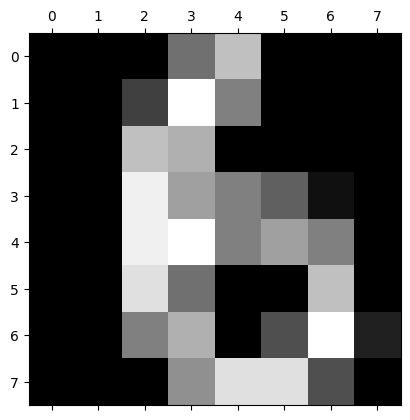

In [190]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

# Notice that, in the MNIST dataset, the images are already flattened, i.e., are
# represented as 64-dimensional vectors, not as 8 by 8 matrices.

# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[0].reshape(8, 8))
plt.gray()
plt.show()

Vamos primeiro exibir a variância dos pixels, função direta dos dados observados. Note que os extremos laterais possuem variância nula, o que é esperado, pois são pixels que sempre são pretos. A variância maior ocorre no centro da imagem, onde os dígitos são escritos. Em particular, a variância é maior para os pixels localizados no centro, um pouco abaixo, onde existe a maior diferença entre os números desenhados. 


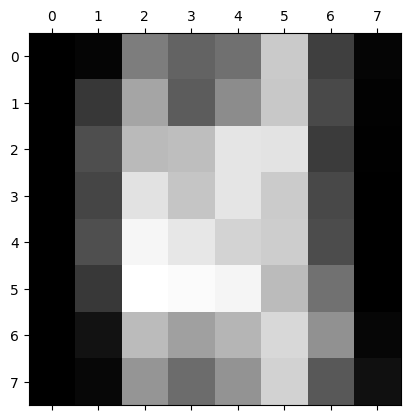

In [191]:

plt.matshow(mnist.features_test.var(axis=0).reshape(8, 8))
plt.gray()
plt.show()


Implementação do código elaborado para o primeiro exercício. Consiste de função k_nn que recebe como parâmetros o conjunto de treinamento, o conjunto de teste, os labels conhecidos e a quantidade de vizinhos desejada. É retornado o vetor de labels classificados. A função exibe ainda a acurácia do modelo e as imagens classificadas erroneamente pra o k especificado, bem como os labels determinados pelo algoritmo e os labels corretos.

In [220]:
import numpy as np
#preciso aplicar k-nn para cada vetor do dataset
#depois, comparar os resultados com as labels de teste
#e calcular a acurácia
def k_nn(dataset, k):
    labels_def= [];
    for vetor1 in dataset.features_test:
        vizinhos = [];
        distancias = [];
        labels = [];
        # print(labels)
        #pra cada vetor dentre os vetores desconhecidos eu calculo a distância para cada vetor conhecido
        for posicao,vetor2 in enumerate(dataset.features_train):
            distancia = np.linalg.norm(vetor1 - vetor2)
            #se ainda não tiver k vizinhos, adiciono o vetor2 e a distância
            if len(vizinhos) < k:
                vizinhos.append(vetor2);
                distancias.append(distancia);
                # print(labels_know[posicao])
                labels.append(dataset.labels_train[posicao]);
                # print(labels)
            elif distancia < max(distancias):
                # Reordeno as listas de modo a deixar o maior por ultimo
                elementos_agrupados = zip(distancias, vizinhos, labels )
                elementos_ordenados = sorted(elementos_agrupados, key=lambda x: x[0])
                distancias, vizinhos, labels= map(list, zip(*elementos_ordenados))
                vizinhos.pop();
                distancias.pop();
                labels.pop();
                vizinhos.append(vetor2);
                distancias.append(distancia);
                labels.append(dataset.labels_train[posicao]);
        #o vizinho correspondente a moda dos labels é o label do vetor1
        pos_moda = labels.index(max(set(labels), key = labels.count));

        np.array(labels_def.append((labels[pos_moda])));
    return labels_def;

def plot1(dataset,k, labels_def):
    print('Para k={k} vizinhos, a acurácia é: {acuracia}'.format(k=k, acuracia = np.mean(labels_def == dataset.labels_test)))
    #printar as imagens classificadas erroneamente em linha horizontal
    print(f'Para k={k} vizinhos as imagens classificadas erroneamente são: '.format(k=k))
    #selecionar os vetores para os quais os labels foram erroneamente nomeados
    mistakes = [dataset.features_test[i] for i, label in enumerate(labels_def) if label != dataset.labels_test[i]]
    fig, axes = plt.subplots(1, len(mistakes), figsize=(10, 4))
    axes[0].set_title(f"Classificações erradas")
    for i, img in enumerate(mistakes):
        axes[i].matshow(img.reshape(8, 8))
        axes[i].axis('off')
    plt.show()
    print('Os labels errados foram classificados como: ')
    #selecionar os labels erroneamente nomeados
    mistakes_labels = [label for i, label in enumerate(labels_def) if label != mnist.labels_test[i]]
    print(mistakes_labels)
    # o correto era classificar como
    print('O correto era classificar como: ')
    #selecionar os labels corretos
    correct_labels = [label for i, label in enumerate(dataset.labels_test) if labels_def[i] != label]
    print(correct_labels)


 

Para k=1 vizinhos, a acurácia é: 0.9822222222222222
Para k=1 vizinhos as imagens classificadas erroneamente são: 


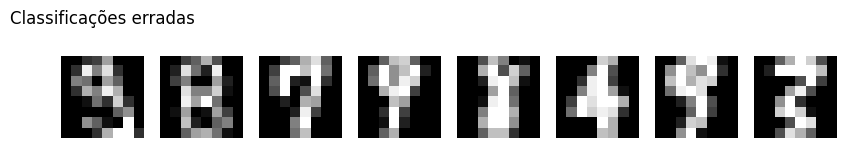

Os labels errados foram classificados como: 
[3, 9, 9, 4, 1, 1, 5, 8]
O correto era classificar como: 
[9, 8, 7, 9, 8, 4, 9, 3]


In [193]:
comando  = k_nn(mnist, 1);
itema = plot1(mnist,1,comando);

Para k=2 vizinhos, a acurácia é: 0.9822222222222222
Para k=2 vizinhos as imagens classificadas erroneamente são: 


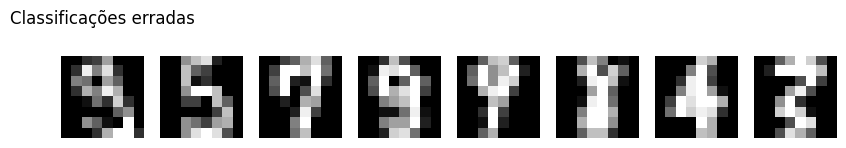

Os labels errados foram classificados como: 
[3, 9, 9, 8, 4, 1, 1, 8]
O correto era classificar como: 
[9, 5, 7, 9, 9, 8, 4, 3]


In [194]:
comando  = k_nn(mnist, 2);
itema = plot1(mnist,2,comando);

Para k=3 vizinhos, a acurácia é: 0.9866666666666667
Para k=3 vizinhos as imagens classificadas erroneamente são: 


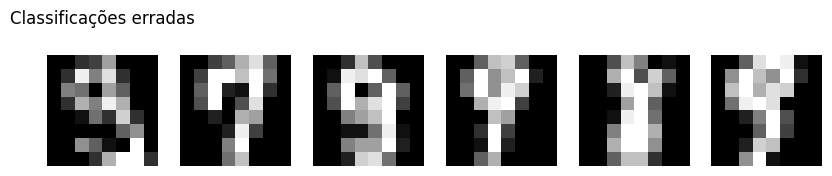

Os labels errados foram classificados como: 
[3, 9, 8, 4, 1, 5]
O correto era classificar como: 
[9, 7, 9, 9, 8, 9]


In [195]:
comando  = k_nn(mnist, 3);
itema = plot1(mnist,3,comando);

Para k=4 vizinhos, a acurácia é: 0.9866666666666667
Para k=4 vizinhos as imagens classificadas erroneamente são: 


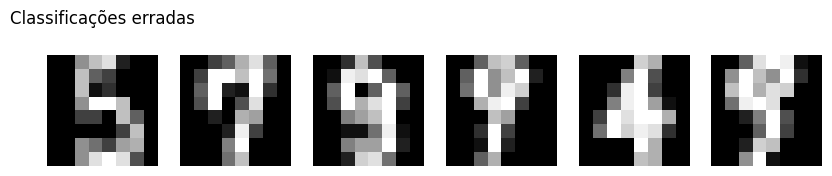

Os labels errados foram classificados como: 
[9, 9, 8, 4, 1, 5]
O correto era classificar como: 
[5, 7, 9, 9, 4, 9]


In [196]:
comando  = k_nn(mnist, 4);
itema = plot1(mnist,4,comando);

Para k=5 vizinhos, a acurácia é: 0.9911111111111112
Para k=5 vizinhos as imagens classificadas erroneamente são: 


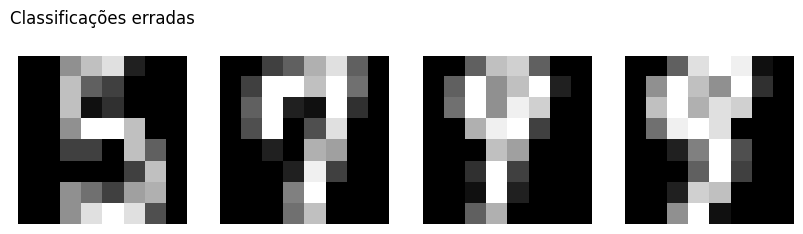

Os labels errados foram classificados como: 
[9, 9, 4, 5]
O correto era classificar como: 
[5, 7, 9, 9]


In [197]:
comando  = k_nn(mnist, 5);
itema = plot1(mnist,5,comando);

Note que na maioria dos casos acima é difícil até mesmo pro ser humano conseguir classificar adequadamente. Isso ocorre porque os número são relativamente parecidos e leves distorções podem alterar o resultado . Isso é um problema comum para o k-NN, que é muito sensível a ruídos e a diferenças pequenas entre as classes.

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

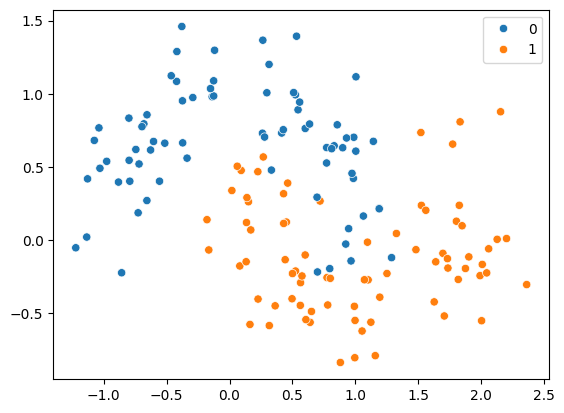

In [198]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

Abaixo, a função auxiliar acuracia responsavel pelo calculo da acuracia do modelo. A função recebe como parâmetros a base de dados contendo conjunto de treino, conjunto de teste e labels conhecidos. A função retorna a acuracia do modelo. 

In [199]:
def acuracia(dataset,k):
    labels_def = k_nn(dataset, k)
    acuracia = np.mean(labels_def == dataset.labels_test)
    return acuracia

for i in range (1, 11):
    comando = k_nn(moon, 1)
    accuracy = acuracia(moon, 1)
    print("Acurácia para k= {i}:".format(i=i), accuracy)




Acurácia para k= 1: 0.94
Acurácia para k= 2: 0.94
Acurácia para k= 3: 0.94
Acurácia para k= 4: 0.94
Acurácia para k= 5: 0.94
Acurácia para k= 6: 0.94
Acurácia para k= 7: 0.94
Acurácia para k= 8: 0.94
Acurácia para k= 9: 0.94
Acurácia para k= 10: 0.94


Abaixo, a função k_nn2() possui leves modificações com relação a função k_nn() do exercício 1. A nova função recebe como base de dados os vetores separadamente (para poder acrescentar os pontos gerados pra malha), enquanto a função anterior recebia a base de dados completa. A função retorna as imagens classificadas par cada k especificado, em ordem crescente de 1-9.\\
É possível notar que conforme o valor de k cresce, a curva de decisão se torna mais suave, ou seja, a fronteira de decisão entre as classes se torna mais suave. Isso ocorre pois a influência de cada ponto na classificação é menor, já que a classificação se torna menos sensível a ruídos e anomalias.

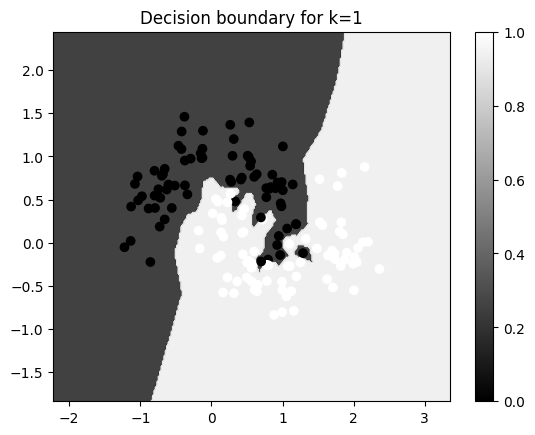

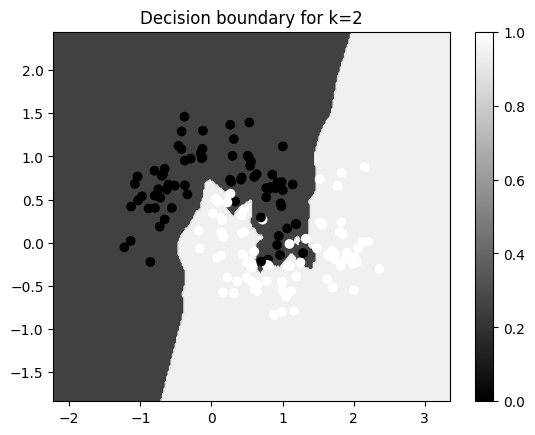

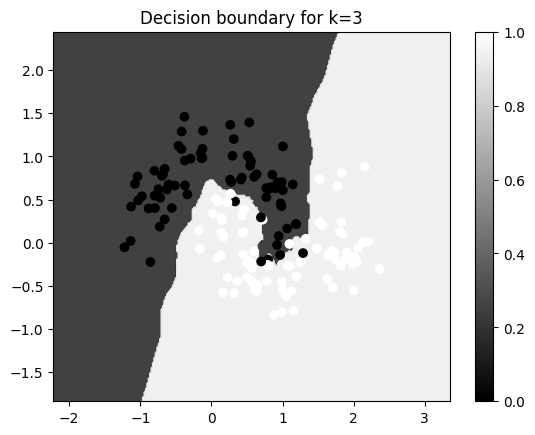

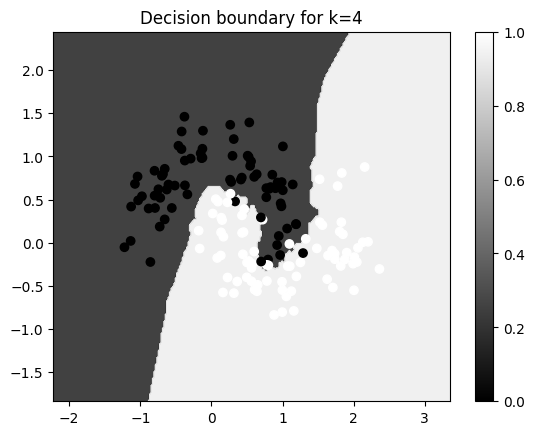

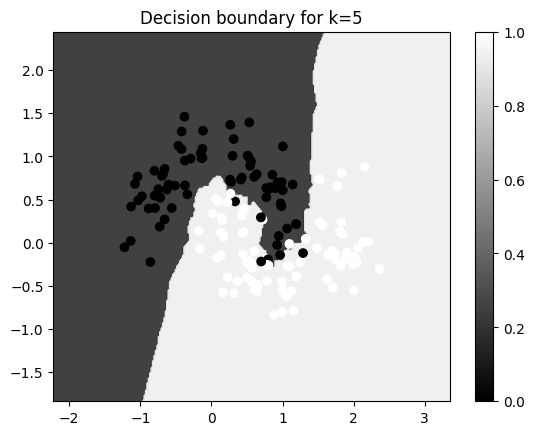

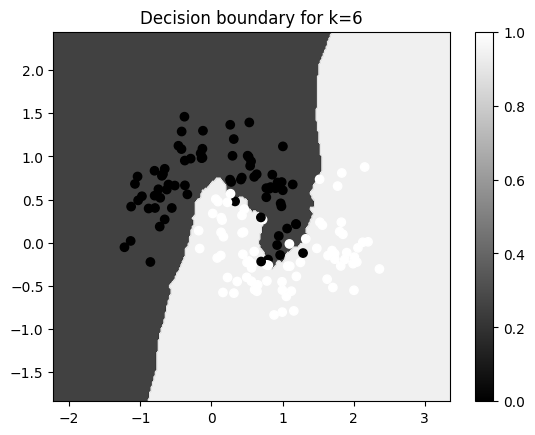

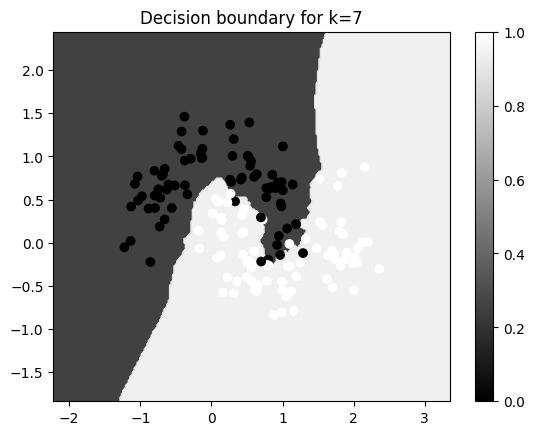

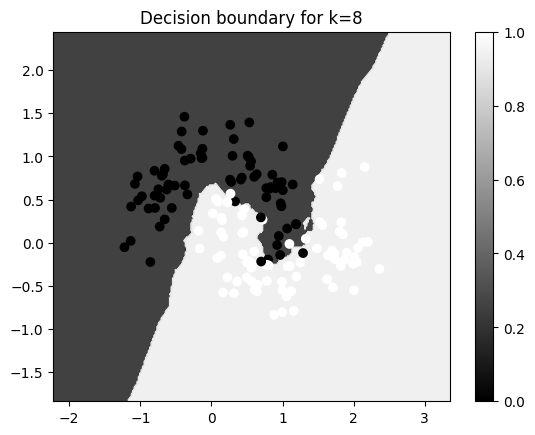

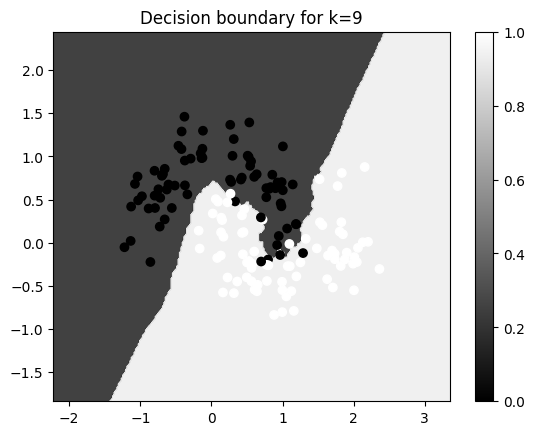

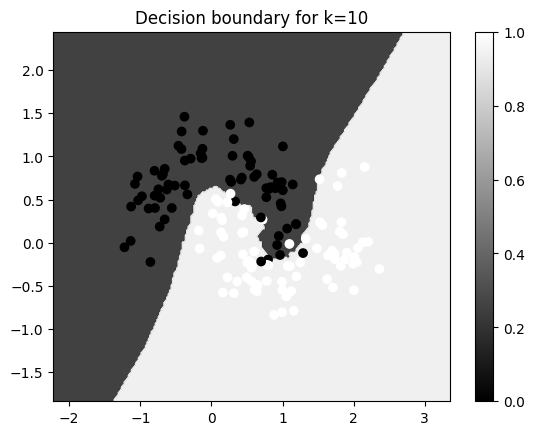

In [223]:
# Let's plot the decision boundary for the moon dataset
# We will use the `predict` method to get the decision boundary
# and the `contourf` method to plot it.

# First, we will create a grid of points to classify
h = 0.02
x_min, x_max = moon.features_train[:, 0].min() - 1, moon.features_train[:, 0].max() + 1
y_min, y_max = moon.features_train[:, 1].min() - 1, moon.features_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h),
)
#quero tornar essa matriz um vetor de coordenadas (x,y)
X = np.array([xx.ravel(), yy.ravel()]).T

def k_nn2(features_test,features_train, labels_train, k):
    labels_def= [];
    for vetor1 in features_test:
        vizinhos = [];
        distancias = [];
        labels = [];
        # print(labels)
        #pra cada vetor dentre os vetores desconhecidos eu calculo a distância para cada vetor conhecido
        for posicao,vetor2 in enumerate(features_train):
            distancia = np.linalg.norm(vetor1 - vetor2)
            #se ainda não tiver k vizinhos, adiciono o vetor2 e a distância
            if len(vizinhos) < k:
                vizinhos.append(vetor2);
                distancias.append(distancia);
                # print(labels_know[posicao])
                labels.append(labels_train[posicao]);
                # print(labels)
            elif distancia < max(distancias):
                # Reordeno as listas de modo a deixar o maior por ultimo
                elementos_agrupados = zip(distancias, vizinhos, labels )
                elementos_ordenados = sorted(elementos_agrupados, key=lambda x: x[0])
                distancias, vizinhos, labels= map(list, zip(*elementos_ordenados))
                vizinhos.pop();
                distancias.pop();
                labels.pop();
                vizinhos.append(vetor2);
                distancias.append(distancia);
                labels.append(labels_train[posicao]);
        #o vizinho correspondente a moda dos labels é o label do vetor1
        pos_moda = labels.index(max(set(labels), key = labels.count));

        np.array(labels_def.append((labels[pos_moda])));
    return labels_def;

for k in range(1, 11):
    Z = k_nn2(X, moon.features_train, moon.labels_train, k)
    Z = np.array(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(moon.features_train[:, 0], moon.features_train[:, 1], c=moon.labels_train)
    #redefinir a escala de cores
    plt.colorbar()
    plt.title(f"Decision boundary for k={k}")
    
    plt.show()

# Exercícios de "papel e caneta"

**Exercício 1.** Como mencionado na nota de aula, é comum *normalizar* os dados antes de utilizar algoritmos de ML. Seja $\mathbf{x} \in \mathcal{X}$ um ponto arbitrário do nosso conjunto de dados (antes de normalização). Deixe também que $\mathcal{V}_k(\mathbf{x})$ seja o conjunto dos $k$ vizinhos mais próximos de $\mathbf{x}$ dentre nossas observações. É possível que $\mathcal{V}_k(\mathbf{x})$ mude caso normalizemos os dados? Prove.


**Solução.** A normalização dos dados consiste em subtrair a média amostral e então multiplicar pela inversa da matriz diagonal $C$ de covariância:
$$C^{-1}(x - \bar{x})$$
$$C^{-1}x - C^{-1}\bar{x}$$
ou podemos realizar um processo mais simples de normalização, que consiste em subtrair a média e então dividir pelo desvio padrão.
COnsidere os dados a seguir, com a distancia dos pontos em relação ao primeiro ponto. Considerando $k=3$, temos que os vizinhos mais próximos são os pontos 2, 4 e 5.

|**Ponto**|**Dinheiro**|**Idade**|**categoria**|**Distância**|
|--|--|--|--|--|
|1|1800|	25	|1|	0.000000|
|2|2000	|30	|0	|200.062490|
|3|500	|35|	1|	1300.038461|
|4|1500	|40	|0|	300.374766|
|5|3000|	45|	0	|1200.166655|

Normalizando esses dados, ficamos com a seguinte tabela:

|**Ponto**|**Dinheiro**|**Idade**|**categoria**|**Distância**|
|--|--|--|--|--|
|1|0.044362	|-1.264911|	1|	0.000000|
|2|0.266174	|-0.632456|	0	|0.670224|
|3|-1.397415	|0.000000|	1	|1.917999|
|4|-0.288355	|0.632456|	0	|1.926318|
|5|1.375233	|1.264911|	0	|2.858534|

Assim, os novos vizinhos são os pontos 2, 3 e 4. Portanto, a normalização dos dados altera os vizinhos mais próximos.


**Exercício 2.** Suponha que estamos usando $k$-NN equipado com distância Mahalanobis $d_M$ (veja Eq. 3.5 das notas de aula). Suponha ainda que $\Sigma$ é a matrix de covariância real dos dados (i.e., do vetor aleatório $\mathbf{x} \sim \mathbb{P}_\mathbf{x}$), ao invés de uma estimativa baseada em amostras. Existe uma transformação $g$ tal que $d_M(a, b) = \|g(a) - g(b) \|_2$? Mostre a transformação e derive a matriz de covariância de $z = g(\mathbf{x})$. 

**Solução.** A matriz de covariância $\sigma$ é simétrica e positiva semi definida, o que implica que ela pode ser diagonalizada. Por consequencia, a inversa $\sigma^{-1}$ também é simétrica positiva semi definida. \
Aqui, vamos usar a decomposição $\sigma = Q\lambda Q^T$ onde $Q$ e $\lambda$ são a matriz de autovetores e a matriz diagonal de autovalores, respectivamente. Usufruindo dessa propriedade no cálculo da distância de Mahalanobis, temos:
$$d_M(a, b) = \sqrt{(a - b)^T \Sigma^{-1} (a - b)}$$

$$d_M(a, b) = \sqrt{(a - b)^T( Q\lambda Q^T)^{-1} (a - b)}$$
Agora, separando a matriz de autovalores em $\lambda = \sqrt{\lambda}\sqrt{\lambda}$, temos:
$$d_M(a, b) = \sqrt{(a - b)^T (Q\sqrt{\lambda}\sqrt{\lambda} Q^T)^{-1} (a - b)}$$
Reagrupando,
$$d_M(a, b) = \sqrt{(a - b)^T ((\sqrt{\lambda}Q^T)^{-1}(Q\sqrt{\lambda}))^{-1} (a - b)}$$
$$d_M(a, b) = \sqrt{(a - b)^TQ\sqrt{\lambda}^{-1}\sqrt{\lambda}^{-1}Q^T (a - b)}$$
$$d_M(a, b) = \sqrt{(Q\sqrt{\lambda}^{-1})^T(a - b)\sqrt{\lambda}^{-1}Q^T (a - b)}$$
$$d_M(a, b) = \sqrt{((\sqrt{\lambda}^{-1}Q^T)(a - b))^T\sqrt{\lambda}^{-1}Q^T (a - b)}$$

Aplicando a propriedade distributiva, temos
$$d_M(a, b) = \sqrt{((\sqrt{\lambda}^{-1})Q^Tx - (\sqrt{\lambda}^{-1})Q^Ty)^T((\sqrt{\lambda}^{-1})Q^Tx - (\sqrt{\lambda}^{-1})Q^Ty)}$$

Se definirmos a transformação $g(\mathbf{x}) = \sqrt{\lambda}^{-1}Q^T\mathbf{x}$, temos uma transformação que permite a utilização da distância euclidiana equivalentemente a distância de Mahalanobis.\

<!-- Aplicando ainda a propriedade de matrizes ortogonais em que $Q^T = Q^{-1}$, temos:
$$d_M(a, b) = \sqrt{(a - b)^T( Q\sqrt{\lambda} Q^T Q\sqrt{\lambda} Q^T)^{-1} (a - b)}$$ -->


PO fim, desejamos encontrar a matriz de covariânciade $g(x)$. Usando o conceito generalizado de matriz de covariância temos:
$$\mathbb{E}[(z - \mathbb{E}[z])(z - \mathbb{E}[z])^T]$$
$$\mathbb{E}[(\sqrt{\lambda}^{-1}Q^T\mathbf{x} - \sqrt{\lambda}^{-1}Q^T\mathbb{E}[x])(\sqrt{\lambda}^{-1}Q^T\mathbf{x} - \sqrt{\lambda}^{-1}Q^TE[x])^T]$$
$$\mathbb{E}[(\sqrt{\lambda}^{-1}Q^Tx - \sqrt{\lambda}^{-1}Q^T\mathbb{E}[x])(x^TQ\sqrt{\lambda}^{-1}-E[x]^TQ\sqrt{\lambda}^{-1})]$$

Aplicando então a distributiva, temos:
$$\mathbb{E}[(\sqrt{\lambda}^{-1}Q^Txx^tQ\sqrt{\lambda}^{-1} - \sqrt{\lambda}^{-1}Q^Tx\mathbb{E}[x]^TQ\sqrt{\lambda}^{-1} - \sqrt{\lambda}^{-1}Q^T\mathbb{E}[x]x^TQ\sqrt{\lambda}^{-1} + \sqrt{\lambda}^{-1}Q^T\mathbb{E}[x]\mathbb{E}[x]^TQ\sqrt{\lambda}^{-1})]$$
$$\sqrt{\lambda}^{-1}Q^T\mathbb{E}[xx^T-x\mathbb{E}[x]^T-\mathbb{E}[x]x^T+\mathbb{E}[x]\mathbb{E}[x]^T]Q\sqrt{\lambda}^{-1}$$
$$\sqrt{\lambda}^{-1}Q^T\mathbb{E}[(x-\mathbb{E}[x])(x-\mathbb{E}[x])^T]Q\sqrt{\lambda}^{-1}$$

Substituindo então o que temos da matriz de covariância de, teremos
$$\sqrt{\lambda}^{-1}Q^T\Sigma Q\sqrt{\lambda}^{-1}$$
$$\sqrt{\lambda}^{-1}Q^TQ\lambda Q^TQ\sqrt{\lambda}^{-1}$$
Pela propriedade de matrizes ortogonais, temos que $Q^TQ = I$, e portanto
$$\sqrt{\lambda}^{-1}I\lambda I\sqrt{\lambda}^{-1}$$
$$\lambda^{-1}\lambda\lambda^{-1}$$
$$I$$
Logo, a derivação da matriz de covariância para a trsnformação $g(x)$ é a matriz identidade.
<!--  A distância Mahalanobis é dada por:
$$d_M(a, b) = \sqrt{(a - b)^T \Sigma^{-1} (a - b)}$$
Seja $g(\mathbf{x}) = \Sigma^{-1/2} \mathbf{x}$. Então:
$$d_M(a, b) = \sqrt{(a - b)^T \Sigma^{-1} (a - b)} = \sqrt{(g(a) - g(b))^T (g(a) - g(b))}$$
$$d_M(a, b) = \|g(a) - g(b) \|_2$$
A matriz de covariância de $z = g(\mathbf{x})$ é dada por:
$$\Sigma_z = \mathbb{E}[(z - \mu_z)(z - \mu_z)^T]$$
$$\Sigma_z = \mathbb{E}[(\Sigma^{-1/2} \mathbf{x} - \Sigma^{-1/2} \mu)(\Sigma^{-1/2} \mathbf{x} - \Sigma^{-1/2} \mu)^T]$$
$$\Sigma_z = \mathbb{E}[\Sigma^{-1/2} (\mathbf{x} - \mu)(\mathbf{x} - \mu)^T \Sigma^{-1/2}]$$
$$\Sigma_z = \Sigma^{-1/2} \mathbb{E}[(\mathbf{x} - \mu)(\mathbf{x} - \mu)^T] \Sigma^{-1/2}$$
$$\Sigma_z = \Sigma^{-1/2} \Sigma \Sigma^{-1/2}$$
$$\Sigma_z = I$$
Portanto, a matriz de covariância de $z = g(\mathbf{x})$ é a matriz identidade. -->